In [1]:
import metapypulation.subpopulation
import metapypulation.individual
from  metapypulation.simulation import Simulation
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from metapypulation.metapopulation import Metapopulation


In [2]:

# migrations = np.genfromtxt('./configs/island_model.csv', delimiter=',')

# migrations = migrations

metapop = Metapopulation(4, "axelrod_interaction", migration_matrix = 'island', carrying_capacities=1000)
metapop.populate()

In [3]:
metapop.migration_matrix

'island'

In [5]:
df_SS = pd.read_csv("./Outputs/stepping_stone.csv")
df_SS["means"] = df_SS.mean(axis=1)

df_IM = pd.read_csv("./Outputs/island.csv")
df_IM["means"] = df_IM.mean(axis=1)

Text(0.5, 0, 'Generations (x 1000)')

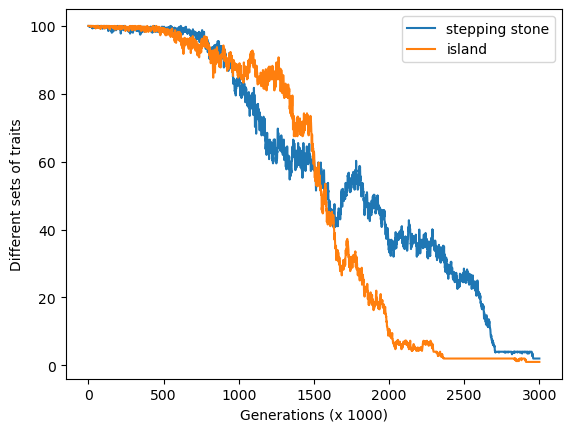

In [6]:
df_SS["means"].plot()
df_IM["means"].plot()
plt.legend(["stepping stone", "island"])
plt.ylabel("Different sets of traits")
plt.xlabel("Generations (x 1000)")

In [2]:
migrations = [[0., 0.001], [0.001, 0.]]
migrations = np.array(migrations)

migrations

array([[0.   , 0.001],
       [0.001, 0.   ]])

In [14]:
sim = Simulation(1000, 10, "stepping_stone", "axelrod_interaction", 100, 2, "test")

In [16]:
sim.migration_matrix

array([[0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.001],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]])

Text(0.5, 1.0, 'Number of unique sets')

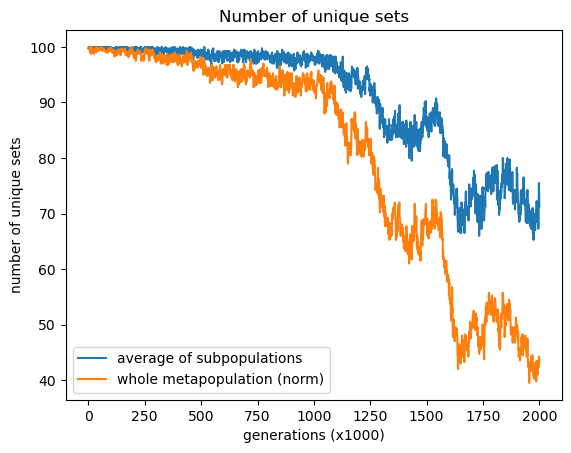

In [15]:
pd.concat([sim.subpop_set_counts, sim.metapop_set_counts/4], axis=1).plot()
plt.legend(["average of subpopulations", "whole metapopulation (norm)"])
plt.xlabel("generations (x1000)")
plt.ylabel("number of unique sets")
plt.title("Number of unique sets")

## Island model VS stepping stone model - 4 subpopulations

In [7]:
pop = 1000
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_set_counts.csv")#, index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_set_counts.csv")#, index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_set_counts.csv")#, index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_set_counts.csv")#, index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/4, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/4, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

# plt.fill_between(island_metapop_counts.index.values, 
#                  island_metapop_counts.mean(axis=1)/4-island_metapop_counts.std(axis=1)/4, 
#                  island_metapop_counts.mean(axis=1)/4+island_metapop_counts.std(axis=1)/4, alpha=0.8)
# plt.fill_between(island_subpop_counts.index.values, 
#                  island_subpop_counts.mean(axis=1)-island_subpop_counts.std(axis=1), 
#                  island_subpop_counts.mean(axis=1)+island_subpop_counts.std(axis=1), alpha=0.8)

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

FileNotFoundError: [Errno 2] No such file or directory: './Outputs/pop1000/island_model/4subpop_metapop_set_counts.csv'

Text(0.5, 1.0, 'Total population = 1000, subpopulations = 4')

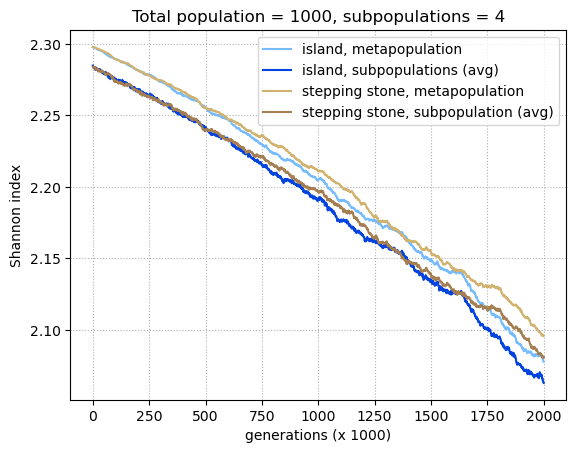

In [104]:
pop = 1000
island_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_shannon.csv")#, index_col=0)
stepping_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_shannon.csv")#, index_col=0)
island_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_shannon.csv")#, index_col=0)
stepping_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_shannon.csv")#, index_col=0)


for dataset in [island_metapop_shannon, stepping_metapop_shannon, island_subpop_shannon, stepping_subpop_shannon]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_shannon.mean(axis=1), color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_shannon.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_shannon.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_shannon.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("Shannon index")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

## 8 subpopulations

Text(0.5, 1.0, 'Total population = 400, 8 subpopulations')

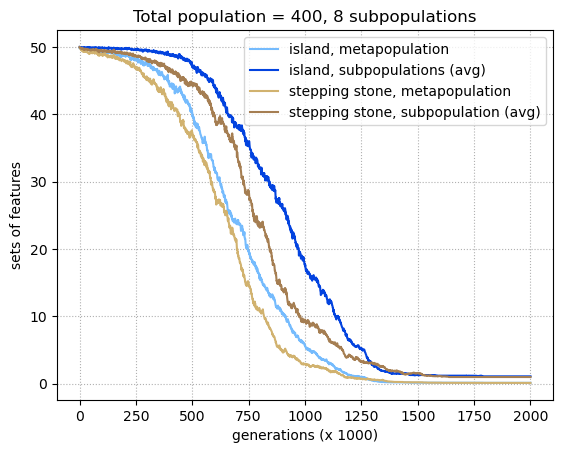

In [21]:
pop = 400
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_subpop_set_counts.csv", index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/8, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/8, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, 8 subpopulations")

Text(0.5, 1.0, 'Total population = 400, 8 subpopulations')

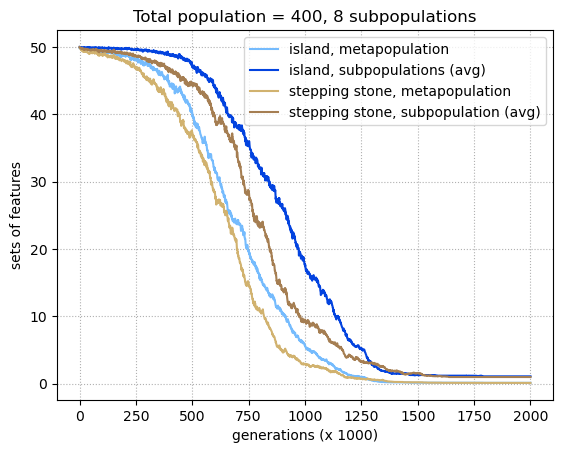

In [22]:
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_subpop_set_counts.csv", index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/8, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/8, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, 8 subpopulations")

## Compare 4 to 8 subpopulations (for metapopulation of 400 people)

Text(0.5, 1.0, 'Total population = 400, island model')

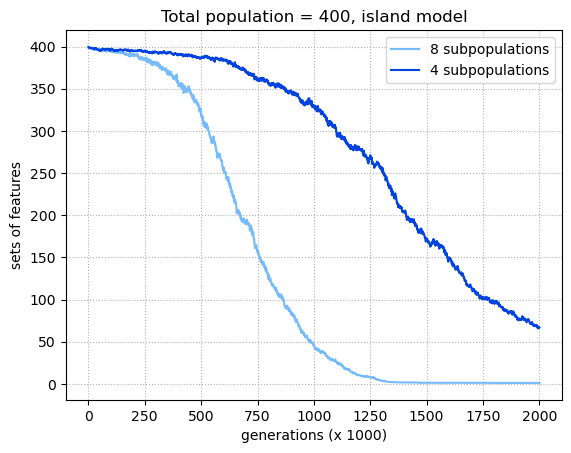

In [46]:
pop = 400
island_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
island_metapop_counts_4 = pd.read_csv(f"./Outputs/pop{pop}/island/4subpop_metapop_set_counts.csv", index_col=0)

plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:sky blue', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:blue', linestyle= '-')

plt.legend(['8 subpopulations', '4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, island model")

Text(0.5, 1.0, 'Total population = 400, stepping-stone model')

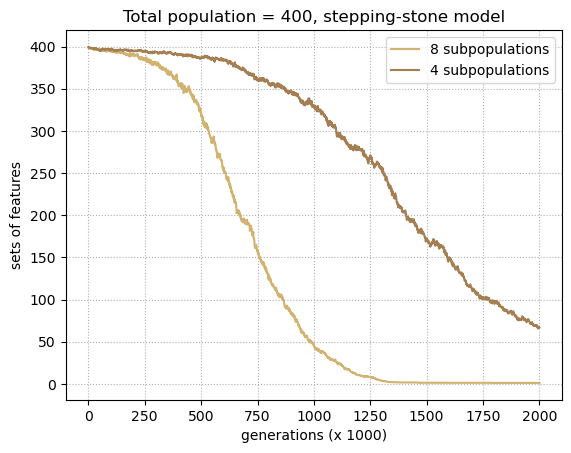

In [48]:
stepping_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts_4 = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_set_counts.csv", index_col=0)

plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['8 subpopulations', '4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, stepping-stone model")

Text(0.5, 1.0, 'Total population = 400, comparison between models')

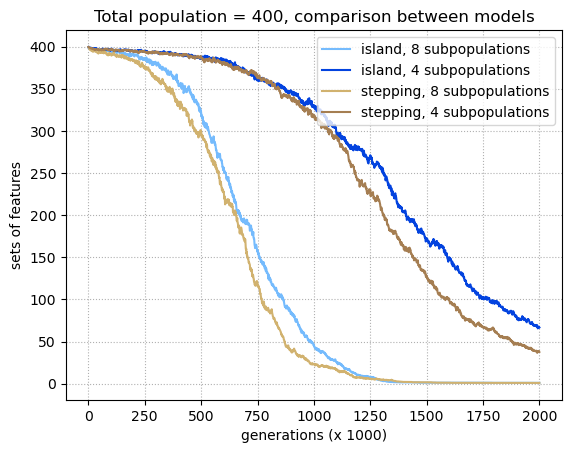

In [49]:
plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:sky blue', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts_8.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(stepping_metapop_counts_4.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, 8 subpopulations', 'island, 4 subpopulations', 
            'stepping, 8 subpopulations', 'stepping, 4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, comparison between models")

In [52]:
island_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)

In [53]:
island_subpop_counts_8

,1,2,3,4,5,6,7,8,9,10
0,50.0,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.00,50.0
1,50.0,50.000,50.000,50.000,50.000,50.000,49.875,50.000,50.00,50.0
2,50.0,50.000,50.000,50.000,49.875,49.750,50.000,50.000,49.75,50.0
3,50.0,49.875,50.000,50.000,49.875,49.875,50.000,49.875,50.00,50.0
4,50.0,50.000,49.875,49.875,50.000,50.000,49.875,50.000,50.00,50.0
...,...,...,...,...,...,...,...,...,...,...
1996,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1997,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1998,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1999,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0


## Comparison with bigger migration rates

In [17]:
pop = 400
island_metapop_counts_m3 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts_m1e-3.csv", index_col=0)
island_metapop_counts_m2 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_m1e-2_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Total population = 400')

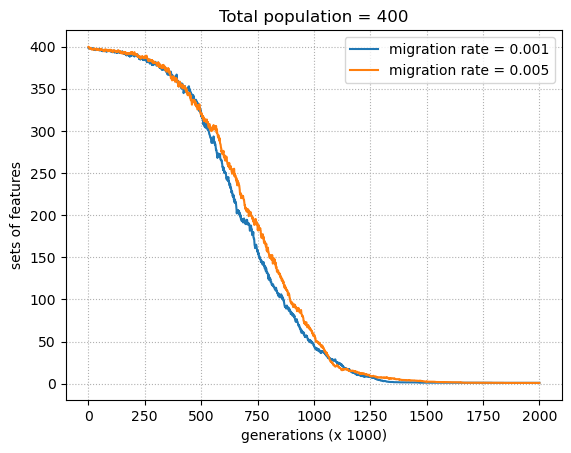

In [19]:
plt.plot(island_metapop_counts_m3.mean(axis=1))
plt.plot(island_metapop_counts_m2.mean(axis=1))

plt.legend(['migration rate = 0.001', 'migration rate = 0.005'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}")

## Test different sequences

In [7]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))

metapopulation = Metapopulation(4, "axelrod_interaction", migrations_zero)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
    
metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 11
The current number of sets in pop 1 is 43
The current number of sets in pop 2 is 37
The current number of sets in pop 3 is 22
Gen 100000!
The current number of sets in pop 0 is 1
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 1
The current number of sets in pop 3 is 1
Gen 150000!
The current number of sets in pop 0 is 7
The current number of sets in pop 1 is 6
The current number of sets in pop 2 is 7
The current number of sets in pop 3 is 7
Gen 200000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 2
The current number of sets in pop 2 is 2
The current number of sets in pop 3 is 2
Gen 250000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 2
The current number o

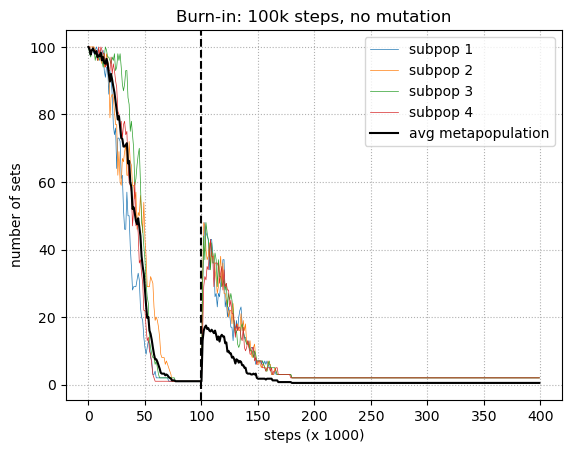

In [9]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop) / 4, linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", "avg metapopulation"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, no mutation")
plt.savefig("no_mutation_test.png")

## Comparison burn-in to no burn-in

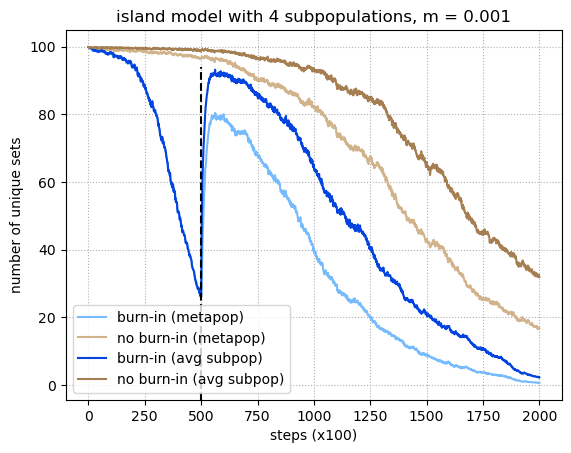

In [10]:
data_burnin_metapop = pd.read_csv('./Outputs/pop400/island/4subpop_m1e-3_burnin_metapop_set_counts.csv', index_col=0)
no_burnin_metapop = pd.read_csv('./Outputs/pop400/island/4subpop_metapop_set_counts_m1e-3.csv', index_col=0)
data_burnin_subpop = pd.read_csv('./Outputs/pop400/island/4subpop_m1e-3_burnin_subpop_set_counts.csv', index_col=0)
no_burnin_subpop = pd.read_csv('./Outputs/pop400/island/4subpop_subpop_set_counts_m1e-3.csv', index_col=0)

plt.plot(data_burnin_metapop.mean(axis=1) / 4, color = 'xkcd:sky blue')
plt.plot(no_burnin_metapop.mean(axis=1) / 4, color = 'tan')
plt.plot(data_burnin_subpop.mean(axis=1), color = 'xkcd:blue')
plt.plot(no_burnin_subpop.mean(axis=1), color = 'xkcd:puce')
plt.grid(linestyle=':')
plt.axvline(500, color="black", linestyle='--', ymax=0.9)
plt.xlabel("steps (x100)")
plt.ylabel("number of unique sets")
plt.title("island model with 4 subpopulations, m = 0.001")
plt.legend(['burn-in (metapop)', 'no burn-in (metapop)', 'burn-in (avg subpop)', 'no burn-in (avg subpop)'])

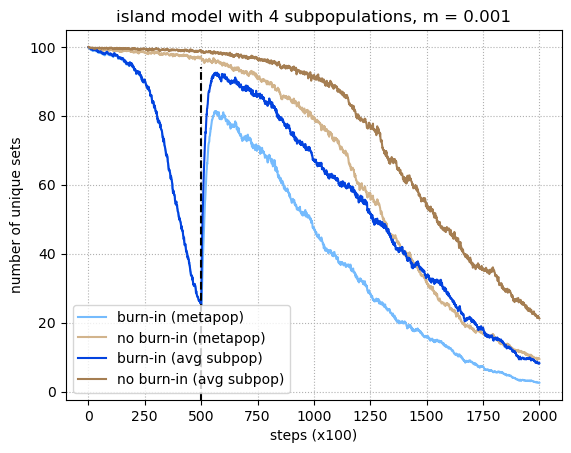

In [98]:
data_burnin_metapop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_m1e-3_burnin_metapop_set_counts.csv', index_col=0)
no_burnin_metapop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_metapop_set_counts.csv', index_col=0)
data_burnin_subpop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_m1e-3_burnin_subpop_set_counts.csv', index_col=0)
no_burnin_subpop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_subpop_set_counts.csv', index_col=0)

plt.plot(data_burnin_metapop.mean(axis=1) / 4, color = 'xkcd:sky blue')
plt.plot(no_burnin_metapop.mean(axis=1) / 4, color = 'tan')
plt.plot(data_burnin_subpop.mean(axis=1), color = 'xkcd:blue')
plt.plot(no_burnin_subpop.mean(axis=1), color = 'xkcd:puce')
plt.grid(linestyle=':')
plt.axvline(500, color="black", linestyle='--', ymax=0.9)
plt.xlabel("steps (x100)")
plt.ylabel("number of unique sets")
plt.title("island model with 4 subpopulations, m = 0.001")
plt.legend(['burn-in (metapop)', 'no burn-in (metapop)', 'burn-in (avg subpop)', 'no burn-in (avg subpop)'])

## Periodic shut down of migration

In [18]:
migrations = np.genfromtxt('./configs/stepping_stone_8pop.csv', delimiter=',') * 100

metapopulation = Metapopulation(8, "axelrod_interaction", migrations)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_pop_5 = []
counts_pop_6 = []
counts_pop_7 = []
counts_pop_8 = []
counts_metapop = []

measure_timing = 1000
verbose_timing = 50000

burn_in = 30000
epoch = 50000
cycle_repetitions = 3

total_time = burn_in + 2*cycle_repetitions*epoch + epoch

for t in range(burn_in):
    if t%measure_timing == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%verbose_timing == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")


    metapopulation.make_interact()

for repetition in range(cycle_repetitions):
    current_time = t
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()
        
    current_time = t    
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        # metapopulation.migrate()
        metapopulation.make_interact()

current_time = t
for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
The current number of sets in pop 4 is 100
The current number of sets in pop 5 is 100
The current number of sets in pop 6 is 100
The current number of sets in pop 7 is 100
Gen 80000!
The current number of sets in pop 0 is 137
The current number of sets in pop 1 is 125
The current number of sets in pop 2 is 129
The current number of sets in pop 3 is 99
The current number of sets in pop 4 is 103
The current number of sets in pop 5 is 62
The current number of sets in pop 6 is 78
The current number of sets in pop 7 is 66
Gen 130000!
The current number of sets in pop 0 is 121
The current number of sets in pop 1 is 104
The current number of sets in pop 2 is 128
The current number of sets in pop 3 is 98
The current number of sets in pop 4 is 72
The current number of sets in pop 5 is 6
The current number of sets in po

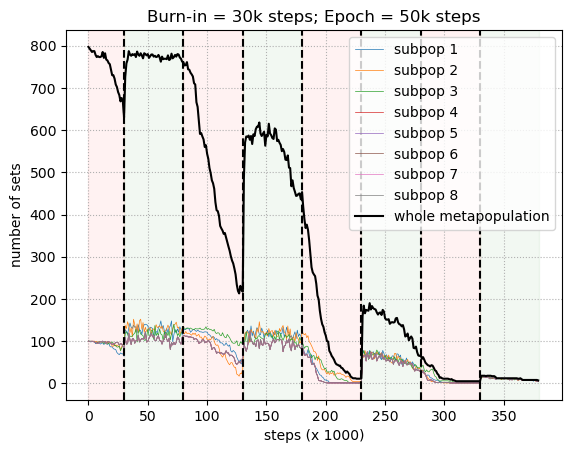

In [19]:
plt.plot(range(int(total_time / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_5, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_6, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_7, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_8, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
for i in range(1, 2*cycle_repetitions + 1):
    plt.axvline(x = (burn_in + i*epoch)/1000, linestyle="--", color = "black")

plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", 
            "subpop 5", "subpop 6", "subpop 7", "subpop 8", "whole metapopulation"])
plt.title(f"Burn-in = {int(burn_in/1000)}k steps; Epoch = {int(epoch/1000)}k steps")

plt.axvspan(0, 30, color = 'red', alpha = 0.05)
for i in range(0, 2*cycle_repetitions + 1):
    if i%2 == 0:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'green', alpha = 0.05)
    else:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'red', alpha = 0.05)

plt.savefig("on-off-no_mut.png")

## Neutral VS Axelrod (stepping stone)

In [17]:
data_axelrod_local = pd.read_csv("./Outputs/pop400/stepping_stone/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/pop400/stepping_stone/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/stepping_stone/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/stepping_stone/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Stepping stone model')

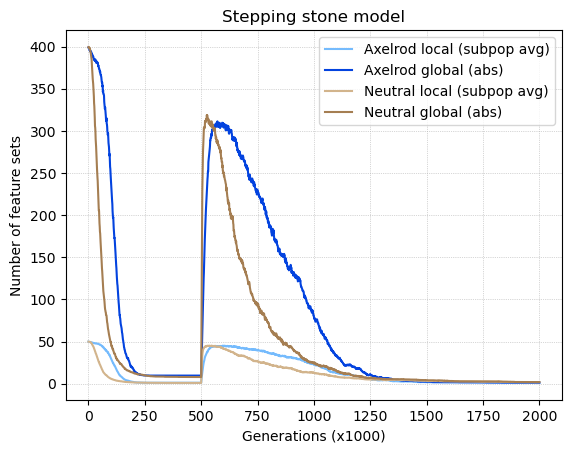

In [18]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Axelrod local (subpop avg)", "Axelrod global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Stepping stone model")
#plt.legend(["Axelrod local", "Neutral local"])

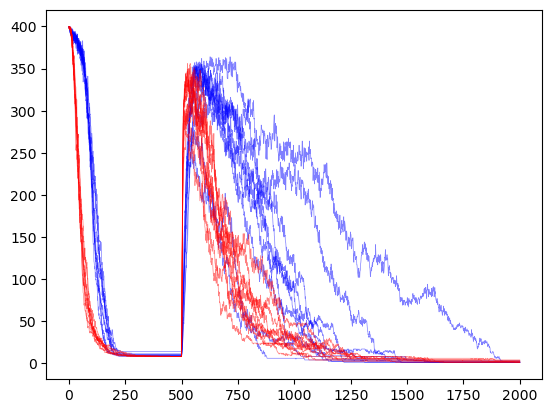

In [5]:
plt.plot(data_axelrod_global, c = "blue", alpha=0.5, linewidth=0.5)
plt.plot(data_neutral_global, c = "red", alpha=0.5, linewidth=0.5)

## Neutral VS Axelrod (Island)

In [13]:
data_axelrod_local = pd.read_csv("./Outputs/pop400/island/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/pop400/island/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/island/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/island/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Island model')

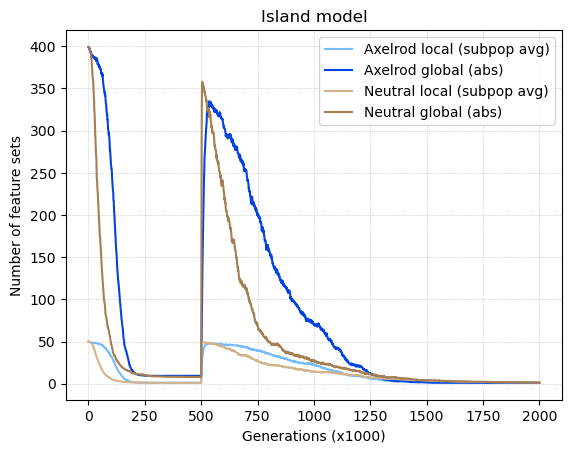

In [16]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Axelrod local (subpop avg)", "Axelrod global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Island model")

In [18]:
import pandas as pd
data_axelrod_local = pd.read_csv("./Outputs/TAG2024/01-neutral-axelrod/4subpop_island_axelrod_interaction_metapop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/TAG2024/01-neutral-axelrod/8subpop_island_axelrod_interaction_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/island/4subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/island/4subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Island model')

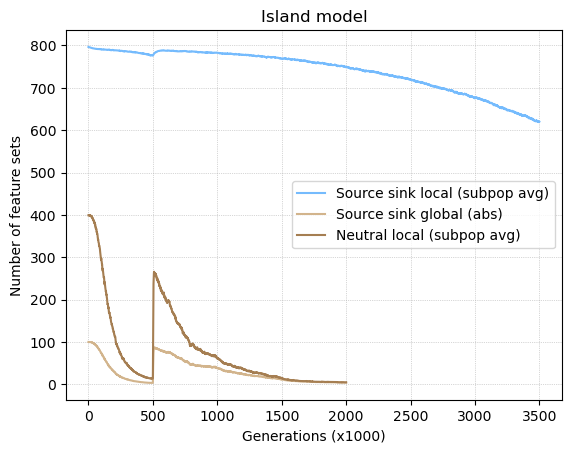

In [21]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
#plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Source sink local (subpop avg)", "Source sink global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Island model")

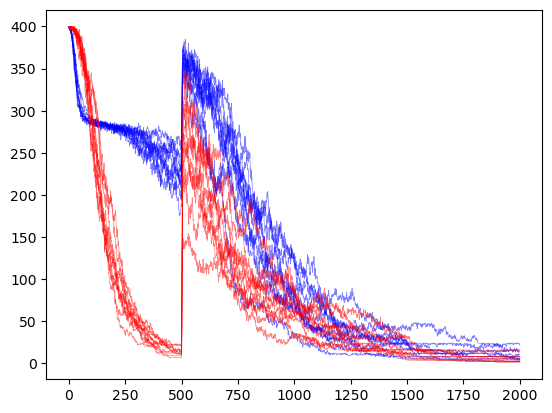

In [27]:
plt.plot(data_axelrod_global, c = "blue", alpha=0.5, linewidth=0.5)
plt.plot(data_neutral_global, c = "red", alpha=0.5, linewidth=0.5)

In [13]:
data_axelrod_local.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
      dtype='int64', length=2001)

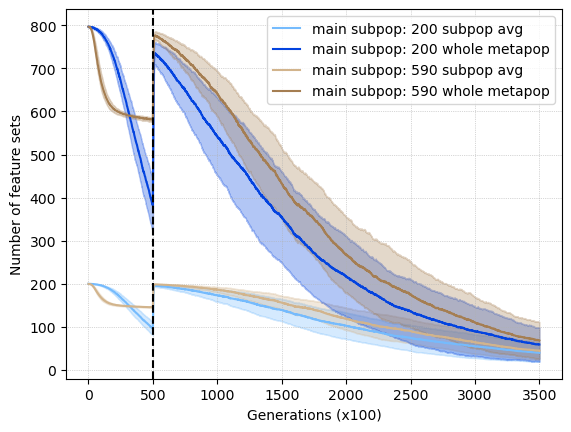

In [20]:
from plotting import plot_comparison, metapopulation_plot_comparison
plot_comparison('./Outputs/TAG2024/01-neutral-axelrod/4subpop_island_neutral_interaction', './Outputs/TAG2024/03-source-sink/4subpop_island_neutral_interaction_590', 
                None, 'main subpop: 200', 'main subpop: 590', './Outputs/TAG2024/03-source-sink/neutral_very_large_imbalance.png')

#plot_comparison('./Outputs/SourceSink/pop400/island/4subpop_m1e-3_burnin_283', './Outputs/neutral/pop400/island/4subpop_m1e-3_burnin', 
#                'Source sink (Largest pop 283)', 'Source-sink', 'Symmetric', './Outputs/source-sink_w-std.png')

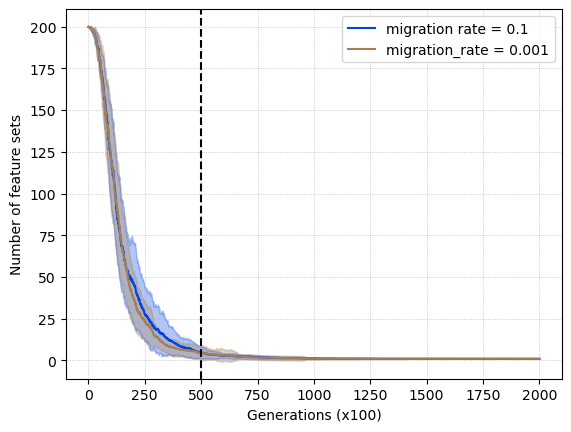

In [3]:

from plotting import plot_comparison, metapopulation_plot_comparison

# metapopulation_plot_comparison('./Outputs/TAG2024/04-migration-rates/4subpop_island_axelrod_interaction_m0.01', 
#                                './Outputs/TAG2024/01-neutral-axelrod/4subpop_island_axelrod_interaction', 
#                                './Outputs/TAG2024/04-migration-rates/4subpop_island_axelrod_interaction_m0.0001',
#                                None, 'migration rate = 0.01', 'migration_rate = 0.001', 'migration_rate = 0.0001',
#                                './Outputs/TAG2024/04-migration-rates/4subpop_island_neutral_migration_rates.png')


metapopulation_plot_comparison(dataset_1 = './Outputs/4subpop_popsize[50, 50, 50, 50]_island_neutral_interaction_0.1_noburnin', 
                               dataset_2 = './Outputs/4subpop_popsize[50, 50, 50, 50]_island_neutral_interaction_0.001_noburnin', 
                               title = None, legend_1 = 'migration rate = 0.1', legend_2 = 'migration_rate = 0.001',
                               output_file = './Outputs/TAG2024/04-migration-rates/noburnin_migration_rates_4subpops.png')

In [9]:
from metapypulation.simulation import Simulation
simulation = Simulation(100, 
                        4, 
                        'island', 
                        'neutral_interaction',
                        100,
                        1,
                        f"./Outputs/test",
                        0,
                        0.01)
                        

array([[0.  , 0.01, 0.01, 0.01],
       [0.01, 0.  , 0.01, 0.01],
       [0.01, 0.01, 0.  , 0.01],
       [0.01, 0.01, 0.01, 0.  ]])

In [8]:
simulation.metapop

AttributeError: 'Simulation' object has no attribute 'metapopulation'

In [16]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))

metapopulation = Metapopulation(4, "axelrod_interaction", migrations_zero, mutation_rate = 0.001)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
    
metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 56
The current number of sets in pop 2 is 45
The current number of sets in pop 3 is 6
Gen 100000!
The current number of sets in pop 0 is 1
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 1
The current number of sets in pop 3 is 1
Gen 150000!
The current number of sets in pop 0 is 19
The current number of sets in pop 1 is 26
The current number of sets in pop 2 is 26
The current number of sets in pop 3 is 25
Gen 200000!
The current number of sets in pop 0 is 11
The current number of sets in pop 1 is 15
The current number of sets in pop 2 is 13
The current number of sets in pop 3 is 9
Gen 250000!
The current number of sets in pop 0 is 4
The current number of sets in pop 1 is 4
The current num

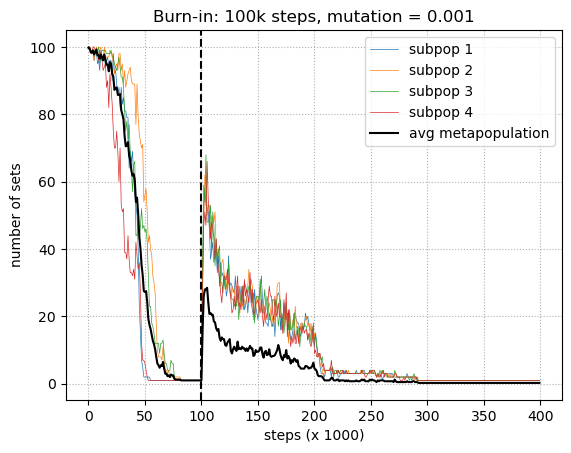

In [17]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop) / 4, linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", "avg metapopulation"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, mutation = 0.001")
plt.savefig("mutation10e-3_test.png")

In [22]:
migrations = np.genfromtxt('./configs/stepping_stone_8pop.csv', delimiter=',') * 100

metapopulation = Metapopulation(8, "axelrod_interaction", migrations, mutation_rate = 0.001)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_pop_5 = []
counts_pop_6 = []
counts_pop_7 = []
counts_pop_8 = []
counts_metapop = []

measure_timing = 1000
verbose_timing = 50000

burn_in = 30000
epoch = 50000
cycle_repetitions = 3

total_time = burn_in + 2*cycle_repetitions*epoch + epoch

for t in range(burn_in):
    if t%measure_timing == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%verbose_timing == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")


    metapopulation.make_interact()

for repetition in range(cycle_repetitions):
    current_time = t
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()
        
    current_time = t    
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        # metapopulation.migrate()
        metapopulation.make_interact()

current_time = t
for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 99
The current number of sets in pop 3 is 100
The current number of sets in pop 4 is 100
The current number of sets in pop 5 is 100
The current number of sets in pop 6 is 99
The current number of sets in pop 7 is 100
Gen 80000!
The current number of sets in pop 0 is 138
The current number of sets in pop 1 is 140
The current number of sets in pop 2 is 98
The current number of sets in pop 3 is 84
The current number of sets in pop 4 is 86
The current number of sets in pop 5 is 102
The current number of sets in pop 6 is 91
The current number of sets in pop 7 is 58
Gen 130000!
The current number of sets in pop 0 is 117
The current number of sets in pop 1 is 119
The current number of sets in pop 2 is 89
The current number of sets in pop 3 is 49
The current number of sets in pop 4 is 53
The current number of sets in pop 5 is 79
The current number of sets in pop 6

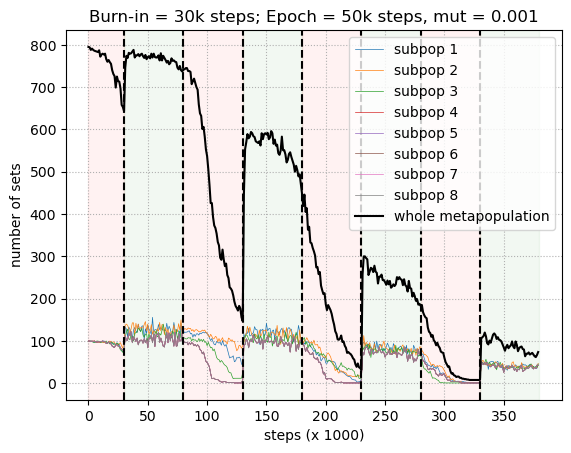

In [23]:
plt.plot(range(int(total_time / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_5, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_6, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_7, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_8, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
for i in range(1, 2*cycle_repetitions + 1):
    plt.axvline(x = (burn_in + i*epoch)/1000, linestyle="--", color = "black")

plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", 
            "subpop 5", "subpop 6", "subpop 7", "subpop 8", "whole metapopulation"])
plt.title(f"Burn-in = {int(burn_in/1000)}k steps; Epoch = {int(epoch/1000)}k steps, mut = 0.001")

plt.axvspan(0, 30, color = 'red', alpha = 0.05)
for i in range(0, 2*cycle_repetitions + 1):
    if i%2 == 0:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'green', alpha = 0.05)
    else:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'red', alpha = 0.05)

plt.savefig("on-off-mut10e-3.png")

In [2]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))

metapopulation = Metapopulation(4, "neutral_interaction", migrations_zero, mutation_rate = 0.001)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].simpson_diversity())
        counts_pop_2.append(metapopulation.subpopulations[1].simpson_diversity())
        counts_pop_3.append(metapopulation.subpopulations[2].simpson_diversity())
        counts_pop_4.append(metapopulation.subpopulations[3].simpson_diversity())
        counts_metapop.append(metapopulation.metapopulation_simpson())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
    
metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].simpson_diversity())
        counts_pop_2.append(metapopulation.subpopulations[1].simpson_diversity())
        counts_pop_3.append(metapopulation.subpopulations[2].simpson_diversity())
        counts_pop_4.append(metapopulation.subpopulations[3].simpson_diversity())
        counts_metapop.append(metapopulation.metapopulation_simpson())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

/home/mtomasini/Documents/06_Development/03_GRIDH/ArchaeologyMetapopulations/MetapopulationsPython/metapypulation/subpopulation.py:225: RuntimeWarning: divide by zero encountered in scalar divide
  simpson_diversity_index = self.get_population_size()*(self.get_population_size() - 1) / sum(simpson_denominators)
/home/mtomasini/Documents/06_Development/03_GRIDH/ArchaeologyMetapopulations/MetapopulationsPython/metapypulation/metapopulation.py:240: RuntimeWarning: divide by zero encountered in scalar divide
  simpson_diversity_index = self.get_metapopulation_size()*(self.get_metapopulation_size() - 1) / sum(simpson_denominators)


Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 5
The current number of sets in pop 1 is 19
The current number of sets in pop 2 is 4
The current number of sets in pop 3 is 27
Gen 100000!
The current number of sets in pop 0 is 5
The current number of sets in pop 1 is 2
The current number of sets in pop 2 is 2
The current number of sets in pop 3 is 16
Gen 150000!
The current number of sets in pop 0 is 64
The current number of sets in pop 1 is 59
The current number of sets in pop 2 is 78
The current number of sets in pop 3 is 59
Gen 200000!
The current number of sets in pop 0 is 45
The current number of sets in pop 1 is 40
The current number of sets in pop 2 is 33
The current number of sets in pop 3 is 42
Gen 250000!
The current number of sets in pop 0 is 22
The current number of sets in pop 1 is 21
The current

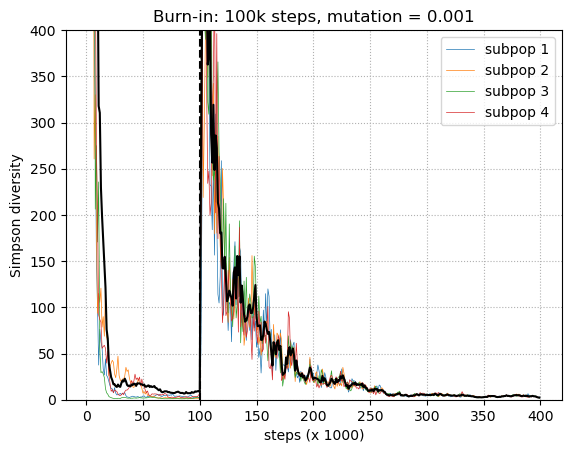

In [3]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("Simpson diversity")
plt.ylim(0, 400)
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, mutation = 0.001")
plt.savefig("simpson_neutral_test.png")